# Projet n°1 - Traitement d'images en Python et stéganographie LSB


## I - Préambule
Pour traiter une image en Python on la tranformera en tableau numpy pour pouvoir ensuite la manipuler.

### I.1 - Lecture de l'image
Nous utiliserons le module matplotlib.image qui permet de charger des images au format .png avec la fonction imread.

In [94]:
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread("image.png")

Le résultat, img, est un tableau numpy. C'est parfois un tableau de float (entre 0 et 1) ou parfois un tableau d'octets, on peut voir son type avec la fonction dtype. On peut être amené à faire une transformation :

In [95]:
img.dtype

dtype('float32')

In [96]:
if img.dtype==np.float32: #si le résultat est un tableau de float
    img=(img*255).astype(np.uint8)
    
img.dtype

dtype('uint8')

### I.2 - Affichage de l'image
Le module matplotlib.pyplot permet d'afficher une image (tableau numpy) avec la fonction imshow.

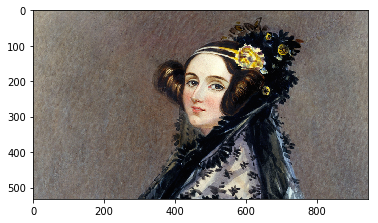

In [97]:
import matplotlib.pyplot as mpplt
mpplt.imshow(img)
mpplt.show()

### I.3 - Manipulation des pixels
On peut créer une image à partir de rien (image de pixels noirs). Pour créer un tableau numpy qui pourra contenir une image :

In [98]:
import numpy as np
image1=np.zeros((640,480,3),dtype=np.uint8) #crée une image de 640x480 de pixels noirs (R=0, V=0, B=0)

On peut aussi créer une image en copiant une image existante :

In [99]:
import numpy as np
image2=np.copy(image1)

Dans une image couleur les plans sont généralement au nombre de 3 : Rouge, Vert et Bleu. Il peut parfois y avoir un 4$^e$ plan qui correspond à la transparence.
Pour obtenir la taille le long de chaque dimension :

In [100]:
img.shape

(532, 945, 4)

L'image précédente a donc 532 lignes, 945 colonnes et 4 plans. On peut éventuellement enlever le 4$^e$ plan ainsi :

In [101]:
img=img[:,:,:3]

On peut connaître la valeur d'un pixel en donnant la ligne et la colonne :

In [102]:
img[100,200]

array([106,  94,  86], dtype=uint8)

La valeur du rouge est 106, celle du vert est 94 et celle du bleu est 86.

On modifie un pixel ainsi :

In [103]:
img[100,200]=(96,108,78)

Voici un exemple de fonction qui prend une image en paramètre et renvoie une image modifiée (les composantes vertes et bleues sont annulées). Elle peut servir de base pour construire des filtres :

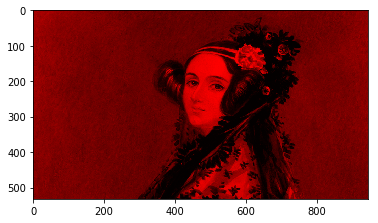

In [104]:
def filtre_rouge(img):
    im=np.copy(img) #on choisit de créer une copie de l'image originale afin de ne pas modifier cette dernière
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            r, v, b=im[i,j]
            im[i,j]=(r,0,0)
    return im

result=filtre_rouge(img)
mpplt.imshow(result)
mpplt.show()

### I.4 - Sauvegarde des images
Matplotlib permet de sauvegarder un tableau numpy au format .png uniquement.

In [105]:
import matplotlib.image as mpimg
mpimg.imsave("resultat.png",result)

## II - Exercices

### Exercice 1
Écrire une fonction `filtre_vert` qui prend une image en paramètre et renvoie une image modifiée en ne gardant que la composante verte.

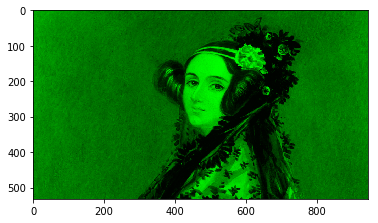

In [106]:
def filtre_vert(img):
    im=np.copy(img) #on choisit de créer une copie de l'image originale afin de ne pas modifier cette dernière
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            r, v, b=im[i,j]
            im[i,j]=(0,r,0)
    return im

result=filtre_vert(img)
mpplt.imshow(result)
mpplt.show()

### Exercice 2
Écrire une fonction `niveaux_de_gris` qui prend une image en paramètre et renvoie une image convertie en niveaux de gris.

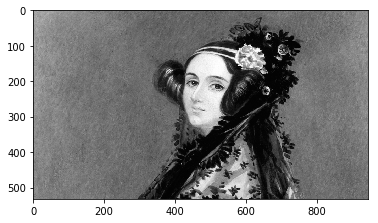

In [107]:
def niveaux_de_gris(img):
    im=np.copy(img) #on choisit de créer une copie de l'image originale afin de ne pas modifier cette dernière
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            r, v, b=im[i,j]
            im[i,j]=(r,r,r)
    return im

result=niveaux_de_gris(img)
mpplt.imshow(result)
mpplt.show()

### Exercice 3
Écrire une fonction `cycle` qui prend une image en paramètre et renvoie une image dans laquelle les couleurs sont cyclées, c'est-à-dire qu'un pixel rouge devient vert, une pixel vert devient bleu et un pixel bleu devient rouge.

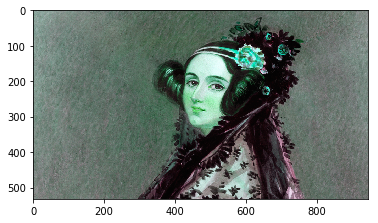

In [108]:
def cycle(img):
    im=np.copy(img) #on choisit de créer une copie de l'image originale afin de ne pas modifier cette dernière
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            r,v,b=im[i,j]
            im[i,j]=(b,r,v)
    return im

result=cycle(img)
mpplt.imshow(result)
mpplt.show()

### Exercice 4
Écrire une fonction `miroir` qui prend une image en paramètre et renvoie une image en miroir (retournement selon l'axe vertical).

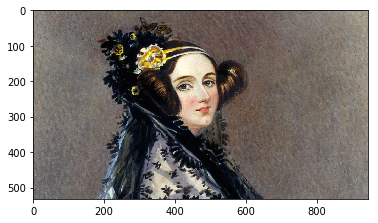

In [137]:
def miroir(img):
    im =np.copy(img) #On crée une copie de l'image
    im1=np.copy(img)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            r,v,b=im[i,-j]
            im1[i,j]=(r,v,b)
    return im1
    
result=miroir(img)
mpplt.imshow(result)
mpplt.show()
#j'ai reussi a faire tourner l'image seulement sur l'axe horizontale

## III - Stéganographie LSB
### III.1 - Principe
La méthode de stéganographie dite LSB (Least Significant Bit) consiste à utiliser les bits les moins significatifs d'un fichier pour en représenter un autre. Ce système se prête tout particulièrement aux images.

Dans une image numérique ordinaire, chaque pixel est représenté par ses composantes Rouge/Vert/Bleu et chaque composante est codée sur un octet. Ainsi, on obtient un image en 16,7 millions de couleurs ($256^3$)

Modifier les bits de poids faible des composantes ne change que très peu la couleur (deux valeurs proches entre 0 et 255 correspondent à des intensités proches).

En revanche, ne connaître que les bits de poids fort permet de reconstituer l'image assez fidèlement.

L'idée de la stéganographie LSB est de stocker les bits de poids fort d'une image (l'image secrète) à l'emplacement des bits de poids faible d'une autre (l'image anodine) qui se trouvera peu affectée.

Pour rechercher une image cachés dans une autre par ce biais, il faut donc sélectionner par exemple les 4 bits de poids faible de chaque composant de chaque pixel (nombre entre 0 et 15) et les multiplier par 16 (décalage de 4 positions binaires).

L'objectif de ce TP est de réaliser un programme qui vous permettra de retrouver l'information cachée dans une image.

### Exercice 6
Écrire une fonction `dCode` qui prend en paramètre `nom` le nom de l'image et `nbBits` le nombre de bits de poids faible à conserver dans l'image finale et renvoie ce résultat. Puis, en dehors de la fonction bien sûr, affichez le résultat.

Vous testerez votre fonction sur les images suivantes : kangourou.png, lion.png, loup.png et perroquet.png (si votre programme est correct vous devriez obtenir un pingouin avec la première image).

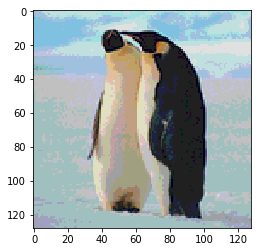

In [110]:

def dCode(nom,nbBits):
    img1=mpimg.imread(nom)
    if img1.dtype==np.float32: #si le résultat est un tableau de float
        img1=(img1*255).astype(np.uint8)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            r,v,b=img1[i,j]
            r=r<<nbBits
            v=v<<nbBits
            b=b<<nbBits
            img1[i,j]=(r,v,b)
    return img1
        
result=dCode("kangourou.png",5)
mpplt.imshow(result)
mpplt.show()

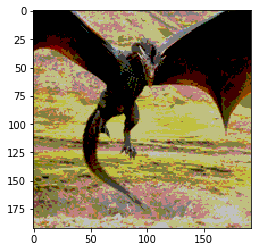

In [111]:
def dCode(nom,nbBits):
    img1=mpimg.imread(nom)
    if img1.dtype==np.float32: #si le résultat est un tableau de float
        img1=(img1*255).astype(np.uint8)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            r,v,b=img1[i,j]
            r=r<<nbBits
            v=v<<nbBits
            b=b<<nbBits
            img1[i,j]=(r,v,b)
    return img1
        
result=dCode("lion.png",6)
mpplt.imshow(result)
mpplt.show()

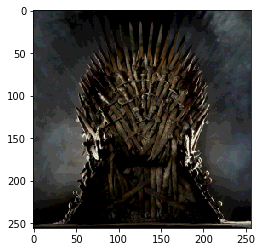

In [112]:
def dCode(nom,nbBits):
    img1=mpimg.imread(nom)
    if img1.dtype==np.float32: #si le résultat est un tableau de float
        img1=(img1*255).astype(np.uint8)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            r,v,b=img1[i,j]
            r=r<<nbBits
            v=v<<nbBits
            b=b<<nbBits
            img1[i,j]=(r,v,b)
    return img1
        
result=dCode("loup.png",4)
mpplt.imshow(result)
mpplt.show()

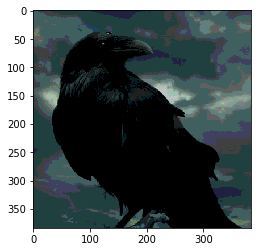

In [153]:
def dCode(nom,nbBits):
    img1=mpimg.imread(nom)
    img1=img1[:,:,:3]
    if img1.dtype==np.float32: #si le résultat est un tableau de float
        img1=(img1*255).astype(np.uint8)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            r,v,b=img1[i,j]
            r=r<<nbBits
            v=v<<nbBits
            b=b<<nbBits
            img1[i,j]=(r,v,b)
    return img1
        
result=dCode("perroquet.png",5)
mpplt.imshow(result)
mpplt.show()

### Exercice 7
Écrire une fonction `Code` qui prend en paramètres `nomImage` le nom du fichier image, `nomMessage` le nom du fichier contenant le message à cacher et `nbBits` le nombre de bits de poids faible à conserver dans l'image finale et renvoie l'image codée. Puis, en dehors de la fonction bien sûr, affichez le résultat et l'enregister sous le nom codage.png.

Vous testerez votre fonction sur les images suivantes : holmes.png et message.png.

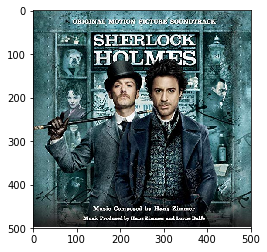

In [151]:
def Code(nomImage,nomMessage,nbBits):
    img2=mpimg.imread(nomImage)
    img3=mpimg.imread(nomMessage)
    img2=img2[:,:,:3]
    img3=img3[:,:,:3]
    if img2.dtype==np.float32: #si le résultat est un tableau de float
        img2=(img2*255).astype(np.uint8)
    if img3.dtype==np.float32: #si le résultat est un tableau de float
        img3=(img3*255).astype(np.uint8)
        
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            R,V,B=img2[i,j]
            R=R>>nbBits
            R=R<<nbBits
            V=V>>nbBits
            V=V<<nbBits
            B=B>>nbBits
            B=B<<nbBits
            r,v,b=img3[i,j]
            r=r<<nbBits
            r=r>>nbBits
            v=v<<nbBits
            v=v>>nbBits
            b=b<<nbBits
            b=b>>nbBits
            R=R+r
            V=V+v
            B=B+b
    return img2
            
result=Code("holmes.png","message.png",6)
mpplt.imshow(result)
mpplt.show()    
mpimg.imsave("codage.png",result)